In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf     #calls the yahoo finance API to download daily stock index prices

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period = "max")    #non trading days are excluded from the data

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-29 00:00:00-05:00,4571.839844,4587.640137,4547.149902,4550.580078,4418760000,0.0,0.0
2023-11-30 00:00:00-05:00,4554.870117,4569.890137,4537.240234,4567.799805,5399300000,0.0,0.0
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,0.0,0.0


Date: The date of the stock market data.
Open: The opening price of the stock on that date.
High: The highest price the stock reached during the trading day.
Low: The lowest price the stock reached during the trading day.
Close: The closing price of the stock on that date.
Volume: The number of shares traded on that date.
Dividends: Any dividends paid on that date.
Stock Splits: Any stock splits that occurred on that date.

Text(0, 0.5, 'Closing Price')

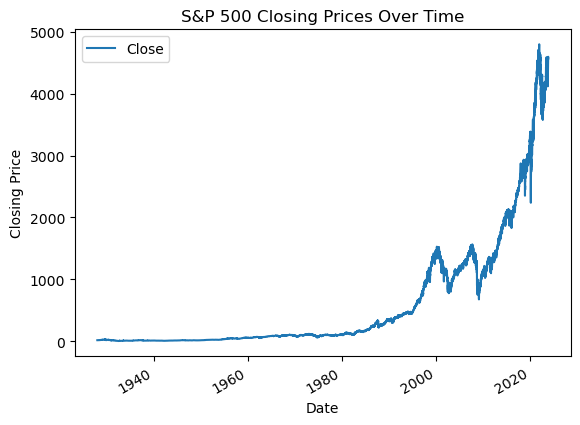

In [5]:
sp500.plot.line(y='Close',use_index=True)

plt.title('S&P 500 Closing Prices Over Time')
plt.ylabel('Closing Price')

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500["Tommorow"] = sp500["Close"].shift(-1)
# The "Tomorrow" column contains the closing prices of stocks for the next day
# The shift method is used to move the next day's closing stock price into the current day's "Tomorrow" column

In [8]:
sp500

,Open,High,Low,Close,Volume,Tommorow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-11-29 00:00:00-05:00,4571.839844,4587.640137,4547.149902,4550.580078,4418760000,4567.799805
2023-11-30 00:00:00-05:00,4554.870117,4569.890137,4537.240234,4567.799805,5399300000,4594.629883
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785


In [9]:
sp500["Target"] = (sp500["Tommorow"] > sp500["Close"]).astype(int)
#Target is True (1) when tommorows price > todays price                -->     price increases tommorow
#Target is False (0) when tommorows price < todays price               -->     price decreases tommorow

In [10]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-11-29 00:00:00-05:00,4571.839844,4587.640137,4547.149902,4550.580078,4418760000,4567.799805,1
2023-11-30 00:00:00-05:00,4554.870117,4569.890137,4537.240234,4567.799805,5399300000,4594.629883,1
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785,0


In [11]:
#Removing all rows before 1995 for better accuracy
sp500 = sp500.loc["1995-01-01":].copy()

In [12]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1
...,...,...,...,...,...,...,...
2023-11-29 00:00:00-05:00,4571.839844,4587.640137,4547.149902,4550.580078,4418760000,4567.799805,1
2023-11-30 00:00:00-05:00,4554.870117,4569.890137,4537.240234,4567.799805,5399300000,4594.629883,1
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785,0


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500,min_samples_split=100,random_state=1)

train = sp500.iloc[:-100]  #All the rows except the last 100 rows
test = sp500.iloc[-100:]   #The last 100 rows

In [14]:
predictors = ["Close", "Volume", "Open", "High", "Low"]
X_train = train[predictors]
y_train = train["Target"]
X_test = test[predictors]
y_test = test["Target"]

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, n_estimators=500, random_state=1)

In [16]:
from sklearn.metrics import precision_score

preds = model.predict(X_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [17]:
preds = pd.Series(preds, index=test.index)
preds

Date
2023-07-17 00:00:00-04:00    1
2023-07-18 00:00:00-04:00    1
2023-07-19 00:00:00-04:00    1
2023-07-20 00:00:00-04:00    1
2023-07-21 00:00:00-04:00    1
                            ..
2023-11-29 00:00:00-05:00    1
2023-11-30 00:00:00-05:00    0
2023-12-01 00:00:00-05:00    1
2023-12-04 00:00:00-05:00    1
2023-12-05 00:00:00-05:00    1
Length: 100, dtype: int32

In [18]:
precision_score(y_test,preds)

0.4931506849315068

In [19]:
combined = pd.concat([y_test,preds], axis = 1)

<Axes: xlabel='Date'>

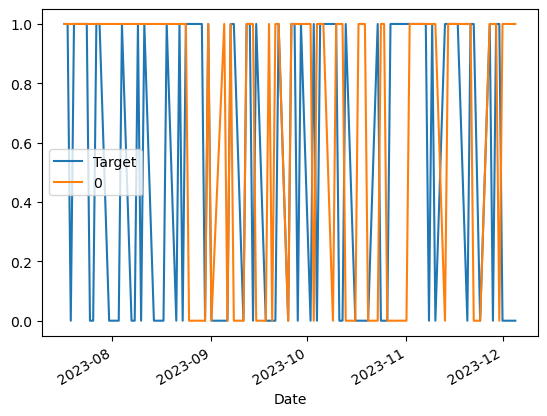

In [20]:
combined.plot()     #plot of actual and predicted values (0 --> predcitions, Target --> actual)

In [21]:
#for back testing
def predict(train, test, predictors, model):
    X_train = train[predictors]
    y_train = train["Target"]
    X_test = test[predictors]
    y_test = test["Target"]
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([y_test,preds], axis = 1)
    return combined

In [22]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [23]:
predictions = backtest(sp500, model, predictors)

In [24]:
predictions["Predictions"].value_counts()

Predictions
0    2563
1    2220
Name: count, dtype: int64

In [25]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5369369369369369

In [26]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.542756
0    0.457244
Name: count, dtype: float64

In [27]:
horizons = [2,5,60,250,1000]      #last 2 days, last trading week, last 3 months, last year, last 4 years
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [28]:
sp500.head(66)

,Open,High,Low,Close,Volume,Tommorow,Target,Close_Ratio2,Trend_2,Close_Ratio5,Trend_5,Close_Ratio60,Trend_60,Close_Ratio250,Trend_250,Close_Ratio1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0,1.001739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1,0.999598,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1,1.000369,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1,1.000163,2.0,1.001077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995-03-30 00:00:00-05:00,503.170013,504.660004,501.000000,502.220001,362940000,500.709991,0,0.999105,0.0,0.999081,3.0,1.044521,41.0,NaN,NaN,NaN,NaN
1995-03-31 00:00:00-05:00,501.940002,502.220001,495.700012,500.709991,353060000,501.850006,1,0.998494,0.0,0.996180,2.0,1.039926,41.0,NaN,NaN,NaN,NaN
1995-04-03 00:00:00-04:00,500.700012,501.910004,500.200012,501.850006,296430000,505.239990,1,1.001137,1.0,0.998985,2.0,1.040810,41.0,NaN,NaN,NaN,NaN


In [29]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,Close_Ratio2,Trend_2,Close_Ratio5,Trend_5,Close_Ratio60,Trend_60,Close_Ratio250,Trend_250,Close_Ratio1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1998-12-16 00:00:00-05:00,1162.829956,1166.290039,1154.689941,1161.939941,725500000,1179.979980,1,0.999617,1.0,1.002113,2.0,1.057997,37.0,1.079900,138.0,1.473186,568.0
1998-12-17 00:00:00-05:00,1161.939941,1180.030029,1161.939941,1179.979980,739400000,1188.030029,1,1.007703,1.0,1.015052,3.0,1.072569,37.0,1.095716,139.0,1.494695,568.0
1998-12-18 00:00:00-05:00,1179.979980,1188.890015,1178.270020,1188.030029,839600000,1202.839966,1,1.003399,2.0,1.018199,3.0,1.077514,38.0,1.102232,139.0,1.503506,569.0
1998-12-21 00:00:00-05:00,1188.030029,1210.880005,1188.030029,1202.839966,744800000,1203.569946,1,1.006194,2.0,1.020113,4.0,1.088346,38.0,1.114881,140.0,1.520820,569.0
1998-12-22 00:00:00-05:00,1202.839966,1209.219971,1192.719971,1203.569946,680500000,1228.540039,1,1.000303,2.0,1.013727,4.0,1.086469,38.0,1.114439,141.0,1.520316,569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-28 00:00:00-05:00,4545.549805,4568.140137,4540.509766,4554.890137,3586240000,4550.580078,0,1.000490,1.0,1.000658,3.0,1.042564,33.0,1.080020,130.0,1.156363,529.0
2023-11-29 00:00:00-05:00,4571.839844,4587.640137,4547.149902,4550.580078,4418760000,4567.799805,1,0.999527,1.0,0.999167,3.0,1.041364,33.0,1.078517,129.0,1.154854,529.0
2023-11-30 00:00:00-05:00,4554.870117,4569.890137,4537.240234,4567.799805,5399300000,4594.629883,1,1.001888,1.0,1.002456,3.0,1.044897,34.0,1.082094,130.0,1.158802,530.0


In [30]:
model = RandomForestClassifier(n_estimators=700,min_samples_split=50,random_state=1)

In [31]:
def predict(train, test, predictors, model):
    X_train = train[predictors]
    y_train = train["Target"]
    X_test = test[predictors]
    y_test = test["Target"]
    model.fit(X_train,y_train)
    preds = model.predict_proba(X_test)[:,1]                               #returns probablity of stock price going up/down
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([y_test,preds], axis = 1)
    return combined

In [32]:
predictions = backtest(sp500, model, new_predictors)

In [33]:
predictions["Predictions"].value_counts()

Predictions
0.0    3339
1.0     443
Name: count, dtype: int64

In [34]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5349887133182845

In [35]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.543363
0    0.456637
Name: count, dtype: float64